- Binary classification problem: dog and cat 
- Colored images 
- Convolutional Neural Networks were used with MaxPooling and Dropout layer
- Training without and with Data Augmentation (rotation, width_shift, height_shift, shear and zoom) for avoiding overfitting
- VGG16 pre-trained model architecture was used to further improve validation accuracy
- For training 2000 images was used
- For validation 1000 images was used 
- For test 1000 images was used  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
%matplotlib inline  
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [4]:
import tensorflow as tf
from tensorflow import keras  

In [5]:
train_dir = '/content/drive/MyDrive/cats_and_dogs_small.zip (Unzipped Files)/train'
validation_dir = '/content/drive/MyDrive/cats_and_dogs_small.zip (Unzipped Files)/validation'
test_dir = '/content/drive/MyDrive/cats_and_dogs_small.zip (Unzipped Files)/test'



## *Data Preprocessing*

- Read the picture file
- Decode the JPEG content to RGB grids of pixels 
- Convert these into floating point tensors
- Rescale the pixel values (between 0 and 255)to the [0, 1] interval  

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
#Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [9]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu' ))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu' ))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu' ))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))



In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [11]:
history = model.fit(
         train_generator,
         steps_per_epoch=100,
         epochs=20,
         validation_data=validation_generator,
         validation_steps=50)

Epoch 1/20
100/100 [==============================] - 1081s 11s/step - loss: 0.6971 - acc: 0.5011 - val_loss: 0.6702 - val_acc: 0.5720
Epoch 2/20
100/100 [==============================] - 106s 1s/step - loss: 0.6594 - acc: 0.6004 - val_loss: 0.6488 - val_acc: 0.5970
Epoch 3/20
100/100 [==============================] - 106s 1s/step - loss: 0.6162 - acc: 0.6656 - val_loss: 0.6142 - val_acc: 0.6440
Epoch 4/20
100/100 [==============================] - 106s 1s/step - loss: 0.5607 - acc: 0.7108 - val_loss: 0.6284 - val_acc: 0.6550
Epoch 5/20
100/100 [==============================] - 108s 1s/step - loss: 0.5348 - acc: 0.7260 - val_loss: 0.5954 - val_acc: 0.6770
Epoch 6/20
100/100 [==============================] - 105s 1s/step - loss: 0.4967 - acc: 0.7629 - val_loss: 0.5754 - val_acc: 0.6950
Epoch 7/20
100/100 [==============================] - 107s 1s/step - loss: 0.4605 - acc: 0.7808 - val_loss: 0.5947 - val_acc: 0.6890
Epoch 8/20
100/100 [==============================] - 107s 1s/step 

<function matplotlib.pyplot.show>

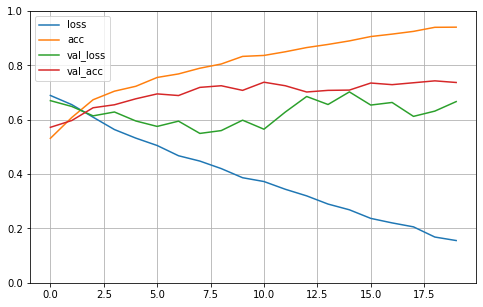

In [12]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

From this model, validation accuracy gets to 75% while accuracy on training about 94% where such large difference in accuracy suggests overfitting in the model. 

In [13]:
model.save("model.h5")

In [14]:
from tensorflow.keras import backend as K

K.clear_session()
del model

## *Data Augmentation for avoiding overfitting*

In [15]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20, 
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3))) 

model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))    


model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [17]:
history = model.fit_generator(
         train_generator,
         steps_per_epoch=62,
         epochs=20,
         validation_data=validation_generator,
         validation_steps=50) 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
62/62 [==============================] - 114s 2s/step - loss: 0.7003 - acc: 0.5416 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 2/100
62/62 [==============================] - 112s 2s/step - loss: 0.6860 - acc: 0.5415 - val_loss: 0.6773 - val_acc: 0.5920
Epoch 3/100
62/62 [==============================] - 112s 2s/step - loss: 0.6821 - acc: 0.5669 - val_loss: 0.7037 - val_acc: 0.5040
Epoch 4/100
62/62 [==============================] - 113s 2s/step - loss: 0.6789 - acc: 0.5788 - val_loss: 0.6468 - val_acc: 0.6110
Epoch 5/100
62/62 [==============================] - 112s 2s/step - loss: 0.6680 - acc: 0.5972 - val_loss: 0.6371 - val_acc: 0.6280
Epoch 6/100
62/62 [==============================] - 112s 2s/step - loss: 0.6635 - acc: 0.5872 - val_loss: 0.6292 - val_acc: 0.6330
Epoch 7/100
62/62 [==============================] - 112s 2s/step - loss: 0.6455 - acc: 0.6189 - val_loss: 0.6259 - val_acc: 0.6470
Epoch 8/100
62/62 [==============================] - 112s 2s/step - loss: 0.

<function matplotlib.pyplot.show>

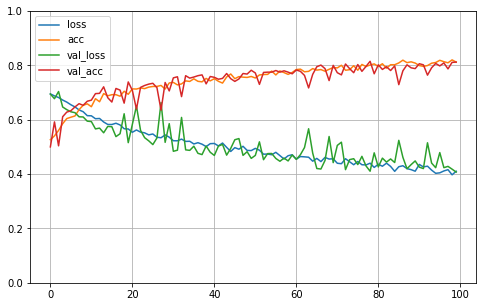

In [18]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

As it can be seen from the graph, in case when data augmentation method was used for data generation,  model has no overfitting. Accuracy for training and validation data are almost same.   

In [19]:
model.save("project_cnn.h5")

# **Applying VGG16 pre-trained model architecture to further increase validation accuracy**



In [11]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20, 
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top = False,
                  input_shape=(150,150,3))

58892288/58889256 [==============================] - 0s 0us/step


In [13]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [25]:
#conv_base.trainable = False

In [16]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

In [17]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('CNN_Project_Model-{epoch:02d}.h5')

In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 50,
    callbacks=[checkpoint_cb])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 1799s 18s/step - loss: 0.6400 - acc: 0.6298 - val_loss: 0.3412 - val_acc: 0.8530
Epoch 2/10
100/100 [==============================] - 1426s 14s/step - loss: 0.3666 - acc: 0.8351 - val_loss: 0.2367 - val_acc: 0.8960
Epoch 3/10
100/100 [==============================] - 1425s 14s/step - loss: 0.2210 - acc: 0.9050 - val_loss: 0.1412 - val_acc: 0.9490
Epoch 4/10
100/100 [==============================] - 1422s 14s/step - loss: 0.1849 - acc: 0.9273 - val_loss: 0.1278 - val_acc: 0.9450
Epoch 5/10
100/100 [==============================] - 1425s 14s/step - loss: 0.1560 - acc: 0.9363 - val_loss: 0.0947 - val_acc: 0.9600
Epoch 6/10
100/100 [==============================] - 1426s 14s/step - loss: 0.1437 - acc: 0.9446 - val_loss: 0.0885 - val_acc: 0.9690
Epoch 7/10
100/100 [==============================] - 1422s 14s/step - loss: 0.1246 - acc: 0.9509 - val_loss: 0.1356 - val_acc: 0.9370
Epoch 8/10
100/100 [==============================] - 1

<function matplotlib.pyplot.show>

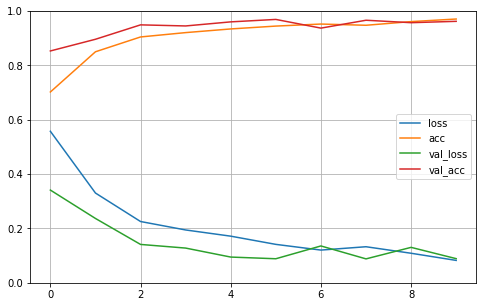

In [20]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

From the graph, it can be seen that accuracy for training data and accuracy for validation data are almost converging toward one point, so there is no overfitting in the model. Accuracy for validation data achieved about 96% in 10 epochs, which is quite good result. VGG16 pre-trained model architecture dramatically increased accuracy result for validation dataset comparing with previous model where validation accuracy get to about 81%.  

To summary: 

1. Training was done to small dataset: 2000 pictures belonging to 2 class: cats and dogs 
2. Comparatively simple model where 4 blocks of Convolutional Neural Networks with MaxPooling was used to achieve about 94% accuracy for training and about 74% accuracy for validation dataset which shows overfitting in the model.
3. Same architecture with additional dropout layer and with data augmentation methods was used to achieve accuracy about 81% for both traing and validation dataset.
4. There are two parts of VGG16 model, conv. base and fully connected neural networks. Conv. base of VGG16 model architecture with final weights was used. 96% accuracy for validation and training data achieved in 10 epochs.     